In [217]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [218]:
os.listdir(".")

['.config', '.ipynb_checkpoints', 'plastics-top-rivers.csv', 'sample_data']

In [219]:
filename = "plastics-top-rivers.csv"
score_df = pd.read_csv(filename)
score_df.head()

,Entity,Country,sharePlastics,plasticWaste
0,Agno,Philippines,0.469647,29587790
1,Agusan,Philippines,0.469647,29587790
2,Bharathappuzha,India,0.357340,22512450
3,Cagayan River,Philippines,0.234824,14793900
4,Cagayan de Oro,Philippines,0.265453,16723530


Looking at the csv we see that we are only working with three columns of data. This is going to be less focused on checking data viablility and more about exploring what the data has to offer.

In [220]:
score_df.rename(columns={"Entity":"River", "sharePlastics":"globalPercentage"},inplace=True)
score_df.head()

,River,Country,globalPercentage,plasticWaste
0,Agno,Philippines,0.469647,29587790
1,Agusan,Philippines,0.469647,29587790
2,Bharathappuzha,India,0.357340,22512450
3,Cagayan River,Philippines,0.234824,14793900
4,Cagayan de Oro,Philippines,0.265453,16723530


In [221]:
score_df.dtypes

River                object
Country              object
globalPercentage    float64
plasticWaste          int64
dtype: object

In [222]:
countries = score_df.groupby(['Country']).sum()
countries

,globalPercentage,plasticWaste
Country,,
Bangladesh,0.265453,16723530
Brazil,0.265453,16723530
Cameroon,0.520696,32803860
China,0.918876,57889150
Cote d'Ivoire,0.336921,21226030
Dominican Republic,0.224614,14150680
India,3.940955,248280170
Indonesia,0.285872,18009960
Malaysia,2.429915,153084660


Now we need to work on the global percentage column. We want trash by volume so we will need to convert using 6.3 billion tons as the global total of plastic waste to date.

In [223]:
print (score_df)

                     River             Country  globalPercentage  plasticWaste
0                     Agno         Philippines          0.469647      29587790
1                   Agusan         Philippines          0.469647      29587790
2           Bharathappuzha               India          0.357340      22512450
3            Cagayan River         Philippines          0.234824      14793900
4           Cagayan de Oro         Philippines          0.265453      16723530
5              Chao Phraya            Thailand          0.408389      25728520
6           Chenzhen River               China          0.296082      18653170
7            Chilyar River               India          0.234824      14793900
8                Cilliwung           Indonesia          0.285872      18009960
9              Davao River         Philippines          0.265453      16723530
10          Douala Estuary            Cameroon          0.234824      14793900
11            Ebrie Lagoon       Cote d'Ivoire      

Now that we have the waste by volume we can start to see how much trash is being added to the ocean each year as both a total and from different rivers and countries.

In [225]:
sumScores = score_df['plasticWaste'].sum()
sumScores

1700654810

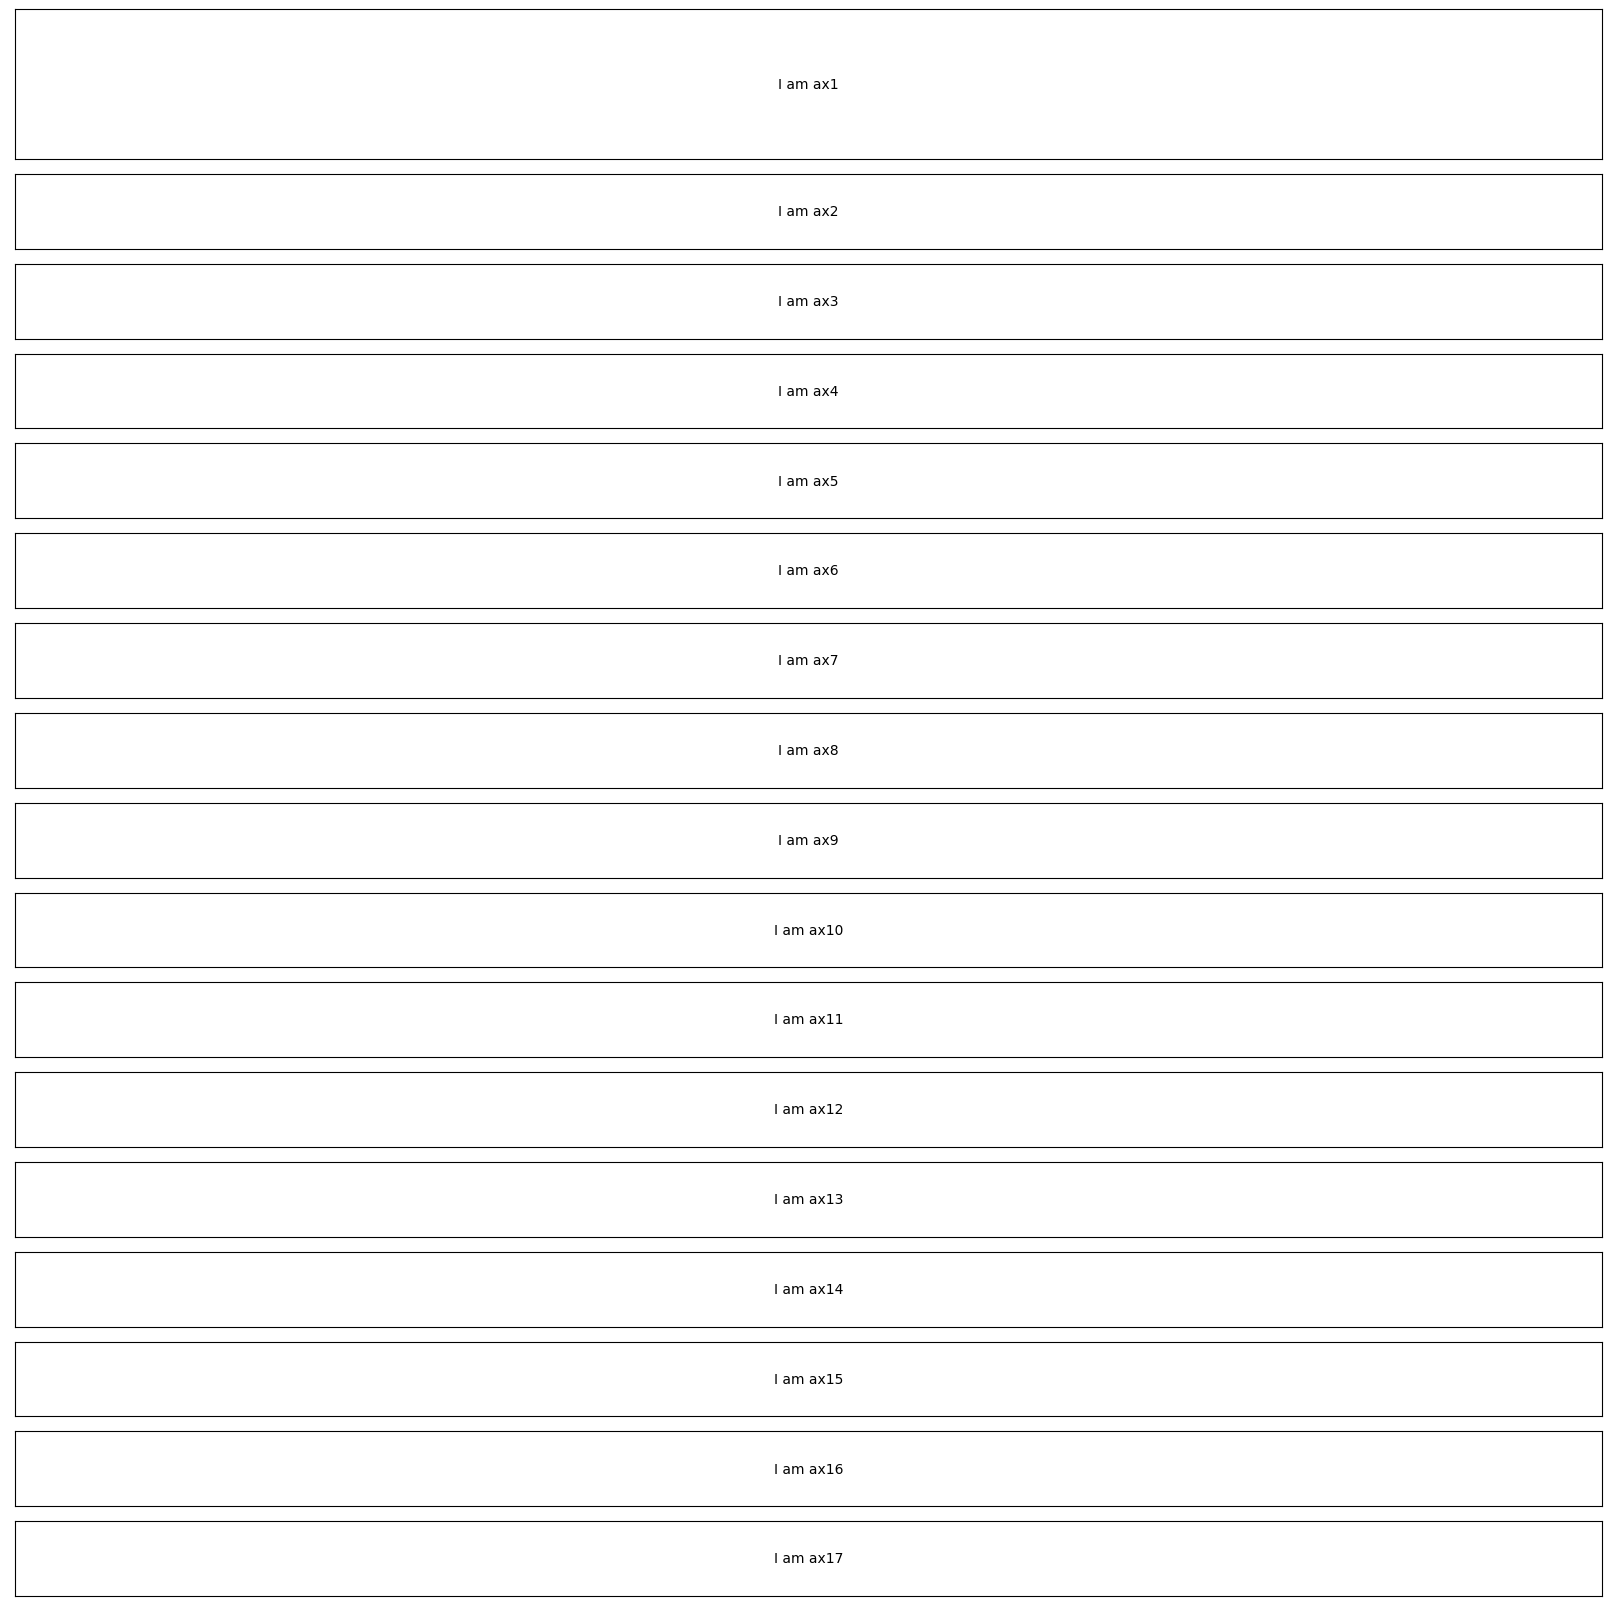

In [231]:
# Set canvas background color the same as axes
plt.rc('figure', facecolor='w')

countryList = ['Bangladesh', 'Brazil', 'Cameroon', 'China',	"Cote d'Ivoire",	'Dominican Republic',	'India',	'Indonesia',	'Malaysia',	'Myamnar',	'Nigeria',	'Philippines',	'Sri Lanka',	'Tanzania',	'Thailand',	'Vietnam']

# set constrianed_layout as True to avoid axes overlap
fig = plt.figure(figsize=(16,16), dpi=100, constrained_layout=True)

# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=18, ncols=10)

# Set up a empty axes that occupied 2 rows and 10 cols in the grid for text
axText = fig.add_subplot(gs[0:2, :])
axText.annotate('I am ax1', (0.5, 0.5),
                xycoords='axes fraction', va='center', ha='center')
axText.get_xaxis().set_visible(False)
axText.get_yaxis().set_visible(False)

# Add axes for temperature bar plots that each occupy 1 row and 8 cols in the grid
for i, city in enumerate(countryList):
    ax = fig.add_subplot(gs[i+2, :], ylim=(-30, 30))
    ax.annotate('I am ax{}'.format(i+2), (0.5, 0.5),
                xycoords='axes fraction', va='center', ha='center')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)




plt.show()

In [233]:
for i, country in enumerate(countryList):
    ax = fig.add_subplot(gs[i+2, :], ylim=(-30, 30))
    
    df_tmp = score_df[score_df['Country'] == country]
    ax.bar(df_tmp.plasticWaste, 6300000000 , width=0.7, align="edge")
    
    
    # customise axes
    ax.spines['bottom'].set_color(None)  
    ax.spines['right'].set_color(None)  
    ax.spines['left'].set_color(None)  
    ax.spines['top'].set_color(None) 
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(city.title(), rotation=0, color='#e3e3e3', fontsize=10, fontweight='bold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
